In [1]:
import torch
import torchvision

In [2]:
n_epochs = 30
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [3]:
mnist_transform = transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        (0.1307,), (0.3081,))
    ]
)

In [4]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        'data', 
        train=True, 
        download=True, 
        transform=mnist_transform
    ),
    batch_size=batch_size_train, 
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        'data', 
        train=False, 
        download=True, 
        transform=mnist_transform
    ),
    batch_size=batch_size_test, 
    shuffle=True
)

In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

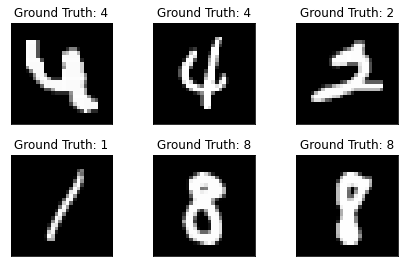

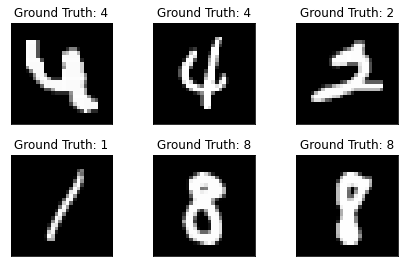

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [86]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [79]:
net = Net()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

In [10]:
criterion = nn.CrossEntropyLoss()

In [11]:
def test(net, test_loader):
    correct = 0
    total = 0

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

In [12]:
for epoch in range(200):
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 0:    # print every 2000 mini-batches
            print('[Epoch %d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
    test(net, test_loader)

print('Finished Training')

/home/vibloteam/python36_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[Epoch 1,     1] loss: 0.001
[Epoch 1,   201] loss: 0.185
[Epoch 1,   401] loss: 0.085
[Epoch 1,   601] loss: 0.063
[Epoch 1,   801] loss: 0.052
Accuracy of the network on the 10000 test images: 86 %
[Epoch 2,     1] loss: 0.000
[Epoch 2,   201] loss: 0.043
[Epoch 2,   401] loss: 0.040
[Epoch 2,   601] loss: 0.037
[Epoch 2,   801] loss: 0.035
Accuracy of the network on the 10000 test images: 90 %
[Epoch 3,     1] loss: 0.000
[Epoch 3,   201] loss: 0.032
[Epoch 3,   401] loss: 0.030
[Epoch 3,   601] loss: 0.029
[Epoch 3,   801] loss: 0.030
Accuracy of the network on the 10000 test images: 91 %
[Epoch 4,     1] loss: 0.000
[Epoch 4,   201] loss: 0.027
[Epoch 4,   401] loss: 0.026
[Epoch 4,   601] loss: 0.026
[Epoch 4,   801] loss: 0.026
Accuracy of the network on the 10000 test images: 93 %
[Epoch 5,     1] loss: 0.000
[Epoch 5,   201] loss: 0.024
[Epoch 5,   401] loss: 0.023
[Epoch 5,   601] loss: 0.024
[Epoch 5,   801] loss: 0.023
Accuracy of the network on the 10000 test images: 93 %


[Epoch 41,   401] loss: 0.010
[Epoch 41,   601] loss: 0.011
[Epoch 41,   801] loss: 0.010
Accuracy of the network on the 10000 test images: 96 %
[Epoch 42,     1] loss: 0.000
[Epoch 42,   201] loss: 0.010
[Epoch 42,   401] loss: 0.011
[Epoch 42,   601] loss: 0.010
[Epoch 42,   801] loss: 0.011
Accuracy of the network on the 10000 test images: 96 %
[Epoch 43,     1] loss: 0.000
[Epoch 43,   201] loss: 0.011
[Epoch 43,   401] loss: 0.011
[Epoch 43,   601] loss: 0.011
[Epoch 43,   801] loss: 0.009
Accuracy of the network on the 10000 test images: 97 %
[Epoch 44,     1] loss: 0.000
[Epoch 44,   201] loss: 0.011
[Epoch 44,   401] loss: 0.010
[Epoch 44,   601] loss: 0.010
[Epoch 44,   801] loss: 0.010
Accuracy of the network on the 10000 test images: 96 %
[Epoch 45,     1] loss: 0.000
[Epoch 45,   201] loss: 0.010
[Epoch 45,   401] loss: 0.011
[Epoch 45,   601] loss: 0.011
[Epoch 45,   801] loss: 0.011
Accuracy of the network on the 10000 test images: 96 %
[Epoch 46,     1] loss: 0.000
[Epoc

[Epoch 81,   401] loss: 0.009
[Epoch 81,   601] loss: 0.008
[Epoch 81,   801] loss: 0.009
Accuracy of the network on the 10000 test images: 96 %
[Epoch 82,     1] loss: 0.000
[Epoch 82,   201] loss: 0.009
[Epoch 82,   401] loss: 0.009
[Epoch 82,   601] loss: 0.008
[Epoch 82,   801] loss: 0.009
Accuracy of the network on the 10000 test images: 97 %
[Epoch 83,     1] loss: 0.000
[Epoch 83,   201] loss: 0.008
[Epoch 83,   401] loss: 0.009
[Epoch 83,   601] loss: 0.009
[Epoch 83,   801] loss: 0.009
Accuracy of the network on the 10000 test images: 97 %
[Epoch 84,     1] loss: 0.000
[Epoch 84,   201] loss: 0.009
[Epoch 84,   401] loss: 0.009
[Epoch 84,   601] loss: 0.009
[Epoch 84,   801] loss: 0.009
Accuracy of the network on the 10000 test images: 97 %
[Epoch 85,     1] loss: 0.000
[Epoch 85,   201] loss: 0.008
[Epoch 85,   401] loss: 0.009
[Epoch 85,   601] loss: 0.008
[Epoch 85,   801] loss: 0.008
Accuracy of the network on the 10000 test images: 97 %
[Epoch 86,     1] loss: 0.000
[Epoc

[Epoch 121,   201] loss: 0.008
[Epoch 121,   401] loss: 0.008
[Epoch 121,   601] loss: 0.008
[Epoch 121,   801] loss: 0.008
Accuracy of the network on the 10000 test images: 97 %
[Epoch 122,     1] loss: 0.000
[Epoch 122,   201] loss: 0.009
[Epoch 122,   401] loss: 0.008
[Epoch 122,   601] loss: 0.007
[Epoch 122,   801] loss: 0.007
Accuracy of the network on the 10000 test images: 97 %
[Epoch 123,     1] loss: 0.000
[Epoch 123,   201] loss: 0.009
[Epoch 123,   401] loss: 0.008
[Epoch 123,   601] loss: 0.009
[Epoch 123,   801] loss: 0.008
Accuracy of the network on the 10000 test images: 97 %
[Epoch 124,     1] loss: 0.000
[Epoch 124,   201] loss: 0.008
[Epoch 124,   401] loss: 0.008
[Epoch 124,   601] loss: 0.008
[Epoch 124,   801] loss: 0.008
Accuracy of the network on the 10000 test images: 97 %
[Epoch 125,     1] loss: 0.000
[Epoch 125,   201] loss: 0.008
[Epoch 125,   401] loss: 0.008
[Epoch 125,   601] loss: 0.008
[Epoch 125,   801] loss: 0.008
Accuracy of the network on the 10000

[Epoch 160,   401] loss: 0.008
[Epoch 160,   601] loss: 0.007
[Epoch 160,   801] loss: 0.008
Accuracy of the network on the 10000 test images: 97 %
[Epoch 161,     1] loss: 0.000
[Epoch 161,   201] loss: 0.008
[Epoch 161,   401] loss: 0.007
[Epoch 161,   601] loss: 0.008
[Epoch 161,   801] loss: 0.008
Accuracy of the network on the 10000 test images: 97 %
[Epoch 162,     1] loss: 0.000
[Epoch 162,   201] loss: 0.008
[Epoch 162,   401] loss: 0.007
[Epoch 162,   601] loss: 0.007
[Epoch 162,   801] loss: 0.007
Accuracy of the network on the 10000 test images: 97 %
[Epoch 163,     1] loss: 0.000
[Epoch 163,   201] loss: 0.008
[Epoch 163,   401] loss: 0.007
[Epoch 163,   601] loss: 0.008
[Epoch 163,   801] loss: 0.007
Accuracy of the network on the 10000 test images: 97 %
[Epoch 164,     1] loss: 0.000
[Epoch 164,   201] loss: 0.007
[Epoch 164,   401] loss: 0.007
[Epoch 164,   601] loss: 0.007
[Epoch 164,   801] loss: 0.007
Accuracy of the network on the 10000 test images: 97 %
[Epoch 165, 

[Epoch 199,   601] loss: 0.007
[Epoch 199,   801] loss: 0.007
Accuracy of the network on the 10000 test images: 97 %
[Epoch 200,     1] loss: 0.000
[Epoch 200,   201] loss: 0.007
[Epoch 200,   401] loss: 0.008
[Epoch 200,   601] loss: 0.008
[Epoch 200,   801] loss: 0.007
Accuracy of the network on the 10000 test images: 97 %
Finished Training


In [13]:
test(net, test_loader)

/home/vibloteam/python36_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 97 %


In [14]:
torch.save(net.state_dict(), "pytorch_model.pt")

# Convert to ONNX

In [97]:
MEAN = 0.1307
STANDARD_DEVIATION = 0.3081

In [166]:
x = torch.tensor([[1, 2, 3, 5], [4, 5, 6, 9], [7, 8, 9, 10]])
print(x.shape)
torch.narrow(x, 0, 0, 3)

torch.Size([3, 4])


tensor([[ 1,  2,  3,  5],
        [ 4,  5,  6,  9],
        [ 7,  8,  9, 10]])

In [184]:
# Inference Net

class InferenceNet(nn.Module):
    def __init__(self):
        super(InferenceNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.reshape(280, 280, 4)
        x = torch.narrow(x, dim=2, start=3, length=1)
        x = x.reshape(1, 1, 280, 280)
        x = F.avg_pool2d(x, 10, stride=10)
        x = x / 255
        x = (x - MEAN) / STANDARD_DEVIATION
        
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.softmax(x)

In [185]:
model = InferenceNet()

In [186]:
model.load_state_dict(torch.load('pytorch_model.pt'))

<All keys matched successfully>

In [187]:
dummy_input = torch.zeros(280*280*4)

In [188]:
model(dummy_input)

torch.Size([280, 280, 1])


/home/vibloteam/python36_env/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[0.0492, 0.3301, 0.1063, 0.0575, 0.0631, 0.1378, 0.0156, 0.1677, 0.0428,
         0.0300]], grad_fn=<SoftmaxBackward>)

In [189]:
torch.onnx.export(model, dummy_input, 'onnx_model.onnx', verbose=True)

torch.Size([280, 280, 1])
graph(%0 : Float(313600, strides=[1], requires_grad=0, device=cpu),
      %conv1.weight : Float(10, 1, 5, 5, strides=[25, 25, 5, 1], requires_grad=1, device=cpu),
      %conv1.bias : Float(10, strides=[1], requires_grad=1, device=cpu),
      %conv2.weight : Float(20, 10, 5, 5, strides=[250, 25, 5, 1], requires_grad=1, device=cpu),
      %conv2.bias : Float(20, strides=[1], requires_grad=1, device=cpu),
      %fc1.weight : Float(50, 320, strides=[320, 1], requires_grad=1, device=cpu),
      %fc1.bias : Float(50, strides=[1], requires_grad=1, device=cpu),
      %fc2.weight : Float(10, 50, strides=[50, 1], requires_grad=1, device=cpu),
      %fc2.bias : Float(10, strides=[1], requires_grad=1, device=cpu),
      %35 : Float(requires_grad=0, device=cpu)):
  %9 : Long(3, strides=[1], device=cpu) = onnx::Constant[value= 280  280    4 [ CPULongType{3} ]]()
  %10 : Float(280, 280, 4, strides=[1120, 4, 1], requires_grad=0, device=cpu) = onnx::Reshape(%0, %9) # <ipython-

/home/vibloteam/python36_env/lib/python3.6/site-packages/ipykernel_launcher.py:15: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  from ipykernel import kernelapp as app
/home/vibloteam/python36_env/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
